In [ ]:
import json
import numpy as np
import os
import pandas as pd
import librosa
import glob
import numpy as np
import tensorflow.keras.callbacks as tfcb
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import seaborn as sns

In [ ]:
#registrasi path drive ke notebook colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Skripsi')

In [ ]:
def save_test_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=256):
  #kamus untuk maping sama label
  data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
        }
  for dirpath, dirnames, filenames in os.walk(dataset_path):

        # Memastikan sedang memroses sub-folder “data” yaitu sedang memroses folder ikhfa, idzhar, iqlab, dan idghom
        if dirpath is not dataset_path:
          semantic_label = dirpath.split("/")[-1]
          print("\nProcessing: {}".format(semantic_label))

          for f in filenames:
            file_path = os.path.join(dirpath, f)
            signal, sample_rate = librosa.load(file_path)

            # perlu zero padding menjadi 3 detik
            padded_audio = librosa.util.fix_length(signal, size=3*sample_rate)

            mfcc = librosa.feature.mfcc(y=padded_audio, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T

            if semantic_label =="iqlab":
              i=0
            elif semantic_label =="ikhfa":
              i=3
            elif semantic_label =="idzhar":
              i=2
            elif semantic_label =="idghom":
              i=1

            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(i)
            print("{}, label ke-:{}".format(file_path, i+1))

  with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
data_path = "data_test"
json_path = "data_test_mfcc.json"

In [ ]:
save_test_mfcc(data_path, json_path)


Processing: idghom
data_test/idghom/002002.wav, label ke-:2

Processing: iqlab
data_test/iqlab/002010.wav, label ke-:1

Processing: idzhar
data_test/idzhar/002006.wav, label ke-:3

Processing: ikhfa
data_test/ikhfa/002004.wav, label ke-:4


In [ ]:
def load_data(data_path):

  with open(data_path, "r") as fp:
    data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

  print("Data lock & loaded")

  return  X, y

In [ ]:
#Load model
model = keras.models.load_model('model_mfcc_ann_real.keras')

prediksi Hukum

In [ ]:
x_prediksi, y_prediksi =load_data("data_test_mfcc.json")

Data lock & loaded


In [ ]:
#kelas aslinya
# 0 merupakan iqlab pada potongan Surah Al-Baqarah ayat 10
# 1 merupakan idgham pada potongan Surah Al-Baqarah ayat 2
# 2 merupakan Idzhar pada potongan Surah Al-Baqarah ayat 6
# 3 merupakan Ikhfa pada potongan Surah Al-Baqarah ayat 4
y_prediksi

array([1, 0, 2, 3])

In [ ]:
#prediksi
y_predic_luar = model.predict(x_prediksi)
y_predic_luar

1/1 [==============================] - 0s 30ms/step


array([[2.1610779e-11, 1.0000000e+00, 4.3554575e-19, 4.7524723e-25],
       [8.2014412e-01, 1.1738810e-01, 1.6075117e-29, 6.2467784e-02],
       [4.8205485e-22, 1.0000000e+00, 1.3255444e-13, 3.1050661e-20],
       [1.0132207e-10, 9.9999940e-01, 7.8451434e-36, 5.9791091e-07]],
      dtype=float32)

# bentuk model

In [ ]:
#prediksi
y_predic_luar = np.argmax (y_predic_luar, axis = 1)
y_predic_luar

array([1, 0, 1, 1])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 3367)              0         
                                                                 
 dense_50 (Dense)            (None, 512)               1724416   
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_51 (Dense)            (None, 256)               131328    
                                                                 
 dense_52 (Dense)            (None, 64)                16448     
                                                                 
 dense_53 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1872452 (7.14 MB)
Trainable params: 187

In [ ]:
import IPython

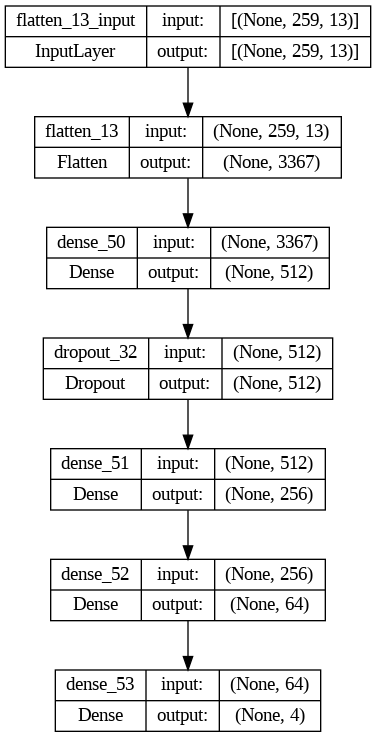

In [ ]:
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image("test_keras_plot_model.png")

In [ ]:
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names).create(prog='dot', format='svg'))